✅ Data loaded. Shape: (284807, 31)


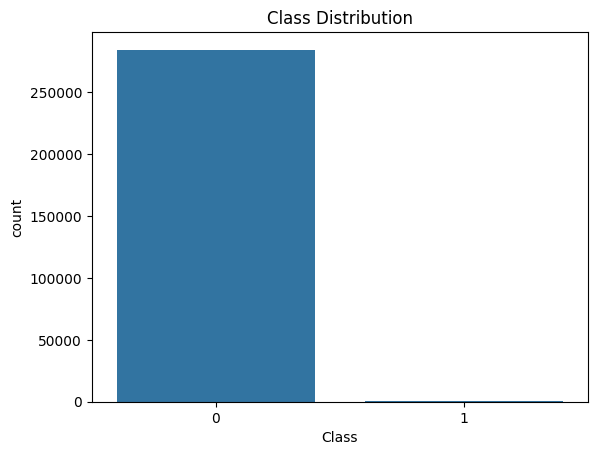

Class
0    284315
1       492
Name: count, dtype: int64


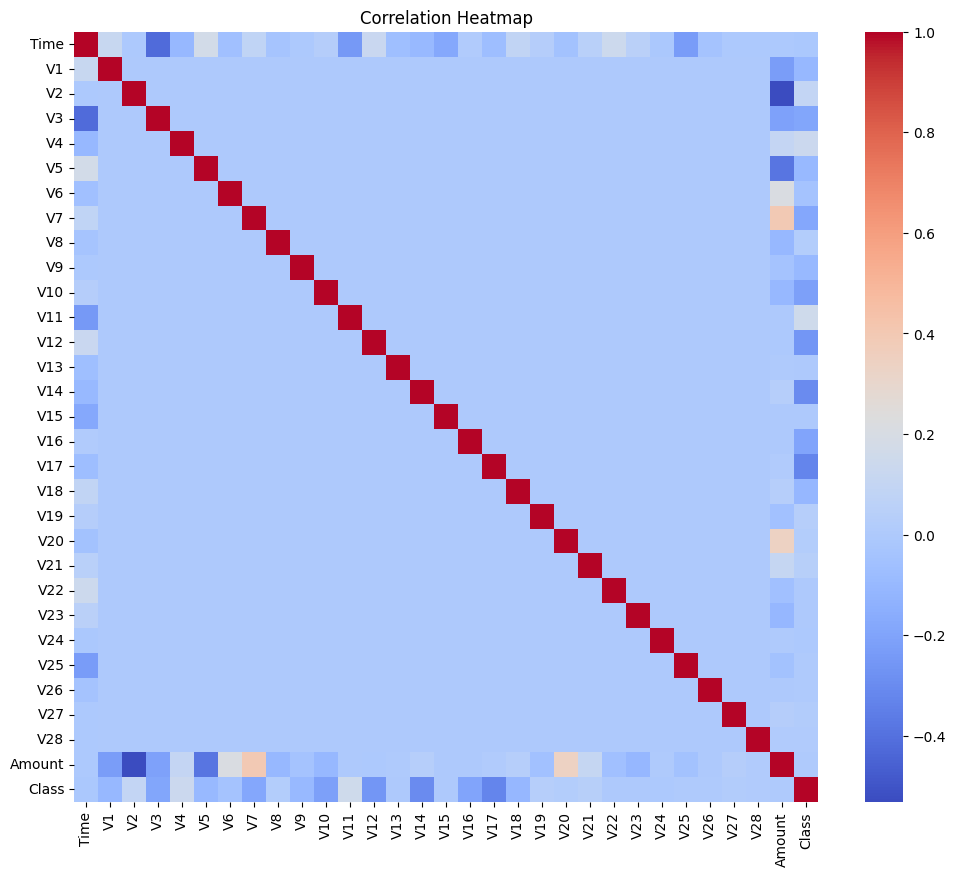

After SMOTE: [199020 199020]
📊 Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8923    0.7838    0.8345       148

    accuracy                         0.9995     85443
   macro avg     0.9460    0.8918    0.9171     85443
weighted avg     0.9994    0.9995    0.9994     85443



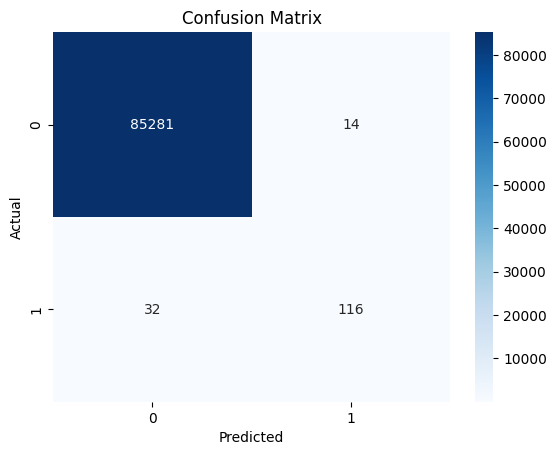

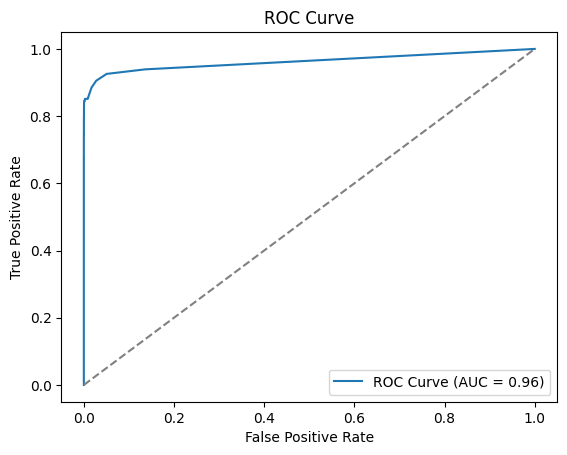

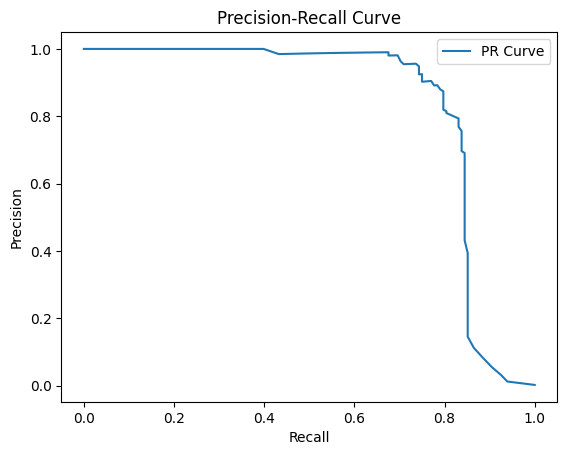

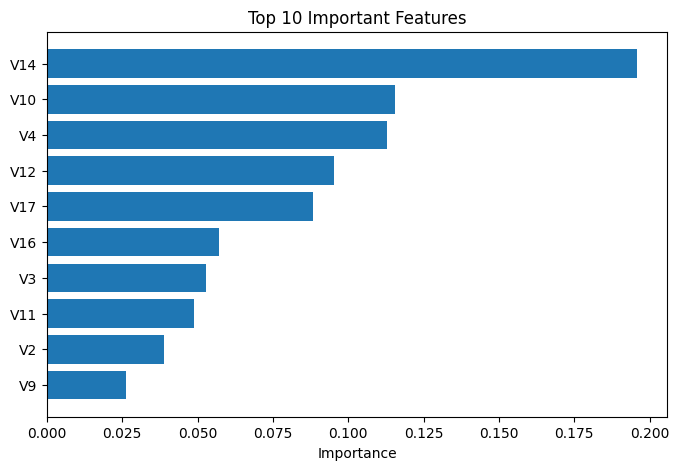

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE


df = pd.read_csv(r'c:\Users\asus\Downloads\creditcard.csv.zip')
print("✅ Data loaded. Shape:", df.shape)


sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.show()
print(df['Class'].value_counts())

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()


X = df.drop('Class', axis=1)
y = df['Class']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE:", np.bincount(y_resampled))


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


importances = model.feature_importances_
feat_names = df.drop('Class', axis=1).columns
sorted_idx = np.argsort(importances)[-10:]  

plt.figure(figsize=(8, 5))
plt.barh(feat_names[sorted_idx], importances[sorted_idx])
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.show()
